In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [6]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [7]:
test_predictions = fitted_model.forecast(36)

In [8]:
test_predictions

1958-02-01    339.142924
1958-03-01    399.281654
1958-04-01    394.233593
1958-05-01    402.545259
1958-06-01    473.128754
1958-07-01    521.795326
1958-08-01    514.513649
1958-09-01    446.216857
1958-10-01    385.430983
1958-11-01    339.645133
1958-12-01    381.455697
1959-01-01    401.210220
1959-02-01    387.159214
1959-03-01    455.812463
1959-04-01    450.049691
1959-05-01    459.538133
1959-06-01    540.114929
1959-07-01    595.671777
1959-08-01    587.359151
1959-09-01    509.392811
1959-10-01    440.000796
1959-11-01    387.732526
1959-12-01    435.462683
1960-01-01    458.014077
1960-02-01    441.973712
1960-03-01    520.346975
1960-04-01    513.768303
1960-05-01    524.600131
1960-06-01    616.585093
1960-07-01    680.007750
1960-08-01    670.518213
1960-09-01    581.513298
1960-10-01    502.296673
1960-11-01    442.628194
1960-12-01    497.116048
1961-01-01    522.860297
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

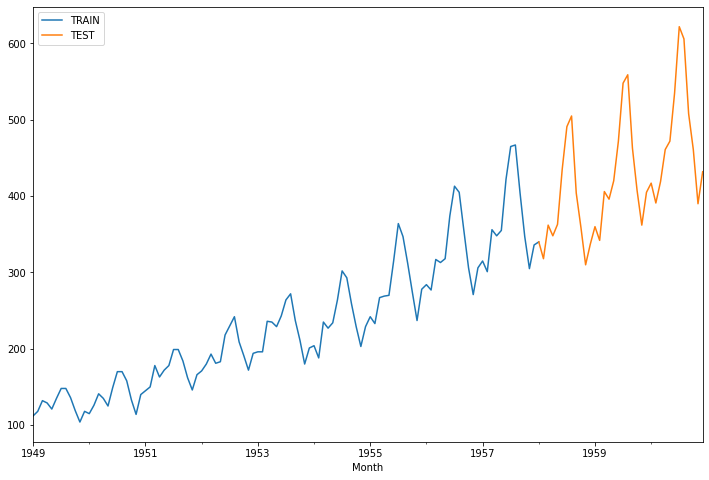

In [9]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')

<AxesSubplot:xlabel='Month'>

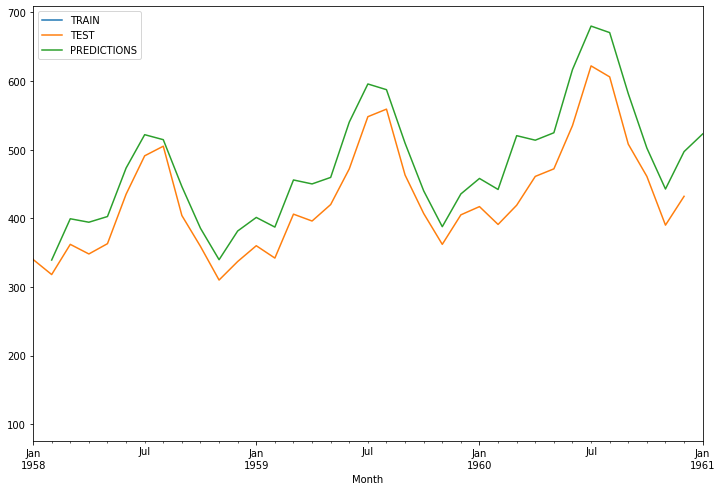

In [10]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label="PREDICTIONS",xlim = ['1958-01-01','1961-01-01'])

In [11]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [14]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [12]:
mean_absolute_error(test_data,test_predictions)

63.03118323113166

In [13]:
mean_squared_error(test_data,test_predictions)

5614.270176608041

In [15]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92843369915083

In [16]:
79.329152 - np.sqrt(mean_squared_error(test_data,test_predictions))

4.400718300849164

In [18]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [19]:
forecast_predictions = final_model.forecast(36)

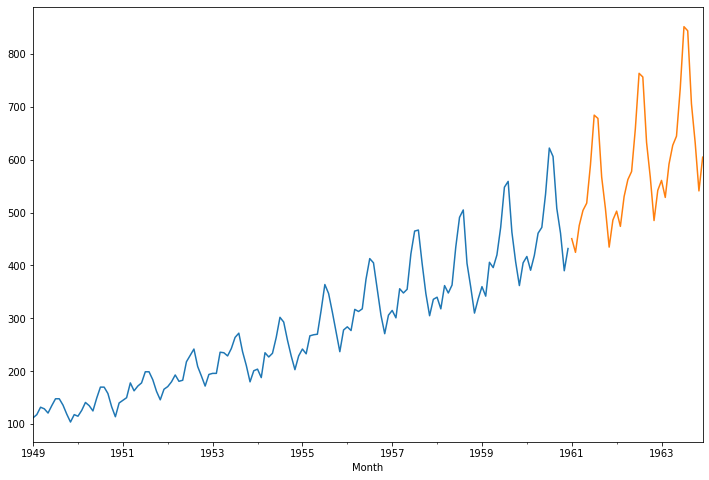

In [21]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

In [22]:
df2 = pd.read_csv('Data/samples.csv',index_col=0,parse_dates=True)

In [23]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


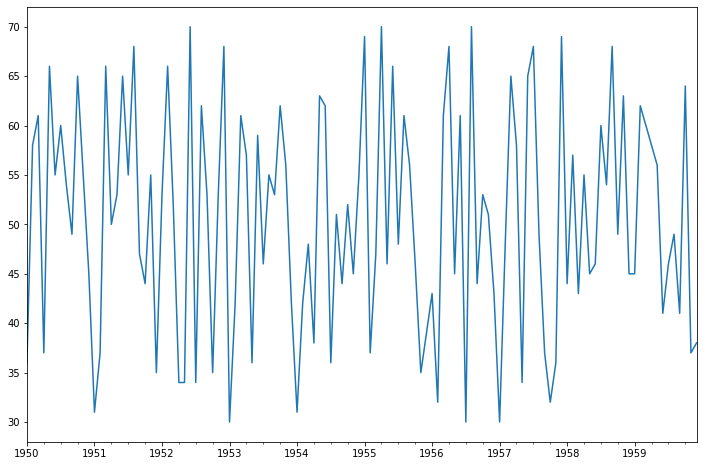

In [25]:
"""Stationary Data - since there is no trends such as upward or downward trend"""
df2['a'].plot(figsize=(12,8));

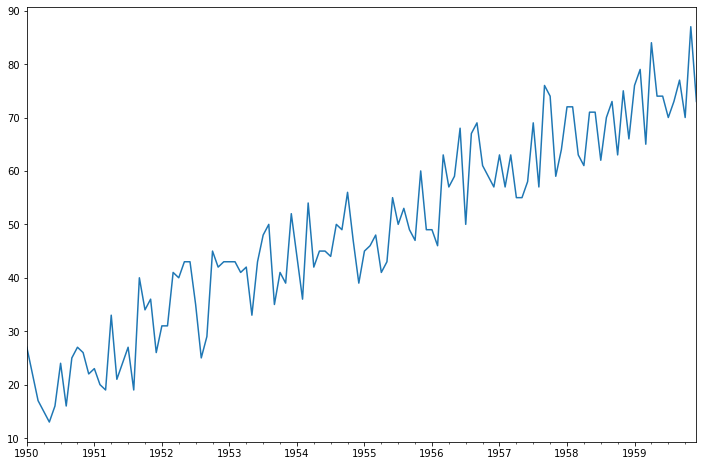

In [29]:
"""This is non stationary data - as it is having a upward trend. Non Stationary data shows seasonality , trend or both"""
df2['b'].plot(figsize=(12,8));

In [30]:
from statsmodels.tsa.statespace.tools import diff

In [32]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

<AxesSubplot:>

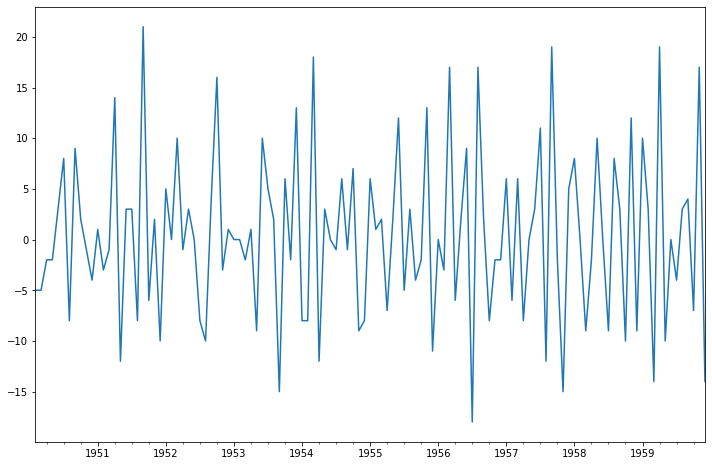

In [35]:
diff(df2['b'],k_diff= 1).plot(figsize = (12,8))